In [29]:
import pandas as pd
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [17]:
#Crear el grafo
gestion = nx.read_graphml('gestion.graphml')

In [12]:
# Función para obtener los atributos del grafo
def obtener_atributos(grafo,datos,num_top):
    notas = []
    for x in datos[:num_top]:
        notas.append(x[0])
    atributos = []
    for a in list(grafo.nodes.data(True)):   
        for x in notas:
            if a[0]==x: 
                atributos.append(a[1])
    df_atributos = pd.DataFrame(atributos)
    return df_atributos

# Función para obtener ek gráfico del grafo
def crear_grafico_colores(grafo,datos,titulo):
    plt.figure(figsize=(15, 10))
    nx.draw(
            gestion, pos = nx.spring_layout(grafo, seed=30), 
            node_color=list(datos.values()), with_labels=False, 
            node_size=[v * 2 for v in dict(grafo.degree()).values()], 
            cmap=plt.cm.plasma
           )
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='')
    plt.title(titulo,fontsize = 20)
    plt.show()

# **Centralidad de Grado**

In [13]:
#calcular los grados como diccionario
centrality = nx.degree_centrality(gestion) #grados normalizados
degrees = dict(gestion.degree()) #grados de cada nodo

In [45]:
#Top de nodos más importantes
valoracion = [(k,v) for k,v in sorted(centrality.items(), key=lambda item:item[1], reverse=True)]
valoracion[:20] #top 5 según grado

[('Q37PDBDCGJGSNOK5RN6GQUNZZI', 0.07469102632993015),
 ('ASTNNL5FQRCZ3HBPEWM76TUQHQ', 0.06770553465878561),
 ('3JEDLCH7BRABDLGZBRSNZXD2MQ', 0.06501880709296078),
 ('E5SQTJ657FED7ENFIP4DYGR2YU', 0.061257388500806025),
 ('KC3R6MQ32BAJLFPL73WCEWHOBA', 0.06018269747447609),
 ('F2FONMR65JAUNFL3ETG3NDQ7BM', 0.05642127888232134),
 ('KVAAMBWZ4VAQHCNPLDP37E2COI', 0.05642127888232134),
 ('LHVCPIRDINDQJAY4U3D5ZLNVBA', 0.055346587855991405),
 ('G3VCQKAQXFB3XCKOBBYG67MRBY', 0.05427189682966148),
 ('WHTP744VOJDCVER4AUUMA6HCDM', 0.05265986029016658)]

### Analizando el top 20 de las notas con más aristas

In [89]:
nodos_atributos = obtener_atributos(gestion,valoracion,20)
nodos_atributos

,categoria,subcategoria,tipo_contenido,autor,titulo,caracteres
0,Mix,Respuestas,free,Ronie Bautista,"¿Qué artículos debe contener tu mochila de emergencia para un sismo en México, según el SSN?",4692
1,Mix,Respuestas,free,Ronie Bautista,"¿Cómo saber si tu mochila de emergencia está bien equipada para sismos en USA, según el USGS?",3834
2,Mix,Respuestas,free,Ronie Bautista,¿Cómo saber si tienes una mochila de emergencia ideal para un sismo en California?,5673
3,Mix,Respuestas,free,Redacción Mix,¿Beneficiarios de la Pensión Bienestar recibirán aguinaldo en diciembre?,3473
4,Mix,Respuestas,free,Redacción Mix,Pensión Bienestar 2024 - Link para consultar fecha de pago de 6 mil pesos,3200
5,Tu dinero,Inmobiliarias,premium,José Carlos Reyes Leyva,Los tres distritos donde la inversión de un inmueble para alquiler se recupera más rápido,4561
6,Peru,Politica,premium,Yuriko Cabeza,Alberto Fujimori: las consecuencias que conlleva su excarcelación,5817
7,Economia,Empresas,premium,Mayumi García,Surquillo y la apuesta gastronómica que abarcará a 30 cuadras del distrito,5057
8,Economia,Empresas,premium,Ani Lu Torres,Las 14 regulaciones empresariales que estarán en la agenda este 2024,360
9,Peru,Politica,free,Redacción Gestión,Liberación de Alberto Fujimori EN VIVO: Expresidente salió hoy del penal Barbadillo,13327


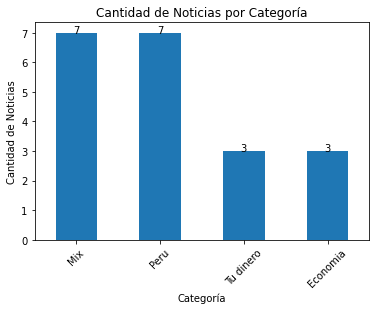

In [90]:
# Crear gráfico de barras
nodos_atributos['categoria'].value_counts().plot(kind='bar')
# Añadir el número en cada barra
for index, value in enumerate(nodos_atributos['categoria'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    
plt.title('Cantidad de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.show()

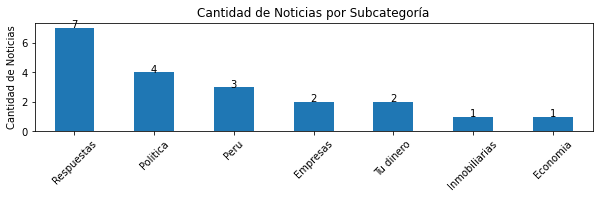

In [95]:
plt.figure(figsize=(10, 2))
# Crear gráfico de barras
nodos_atributos['subcategoria'].value_counts().plot(kind='bar')
# Añadir el número en cada barra
for index, value in enumerate(nodos_atributos['subcategoria'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    
plt.title('Cantidad de Noticias por Subcategoría')
#plt.xlabel('Subcategoría')
plt.ylabel('Cantidad de Noticias')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.show()

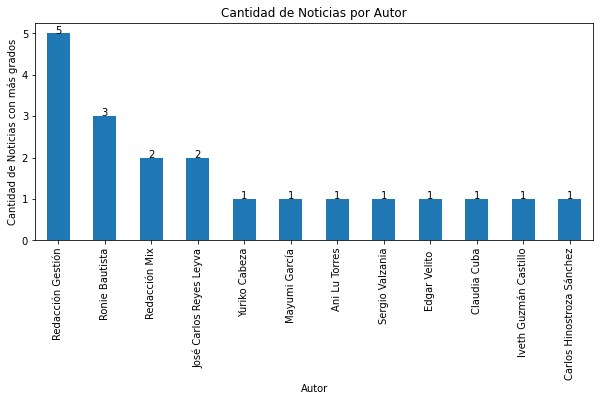

In [92]:
plt.figure(figsize=(10, 4))

# Crear gráfico de barras
nodos_atributos['autor'].value_counts().plot(kind='bar')
# Añadir el número en cada barra
for index, value in enumerate(nodos_atributos['autor'].value_counts()):
    plt.text(index, value, str(value), ha='center')
    


plt.title('Cantidad de Noticias por Autor')
plt.xlabel('Autor')
plt.ylabel('Cantidad de Noticias con más grados')
#plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.show()

## Gráfico de Centralidad de Grado

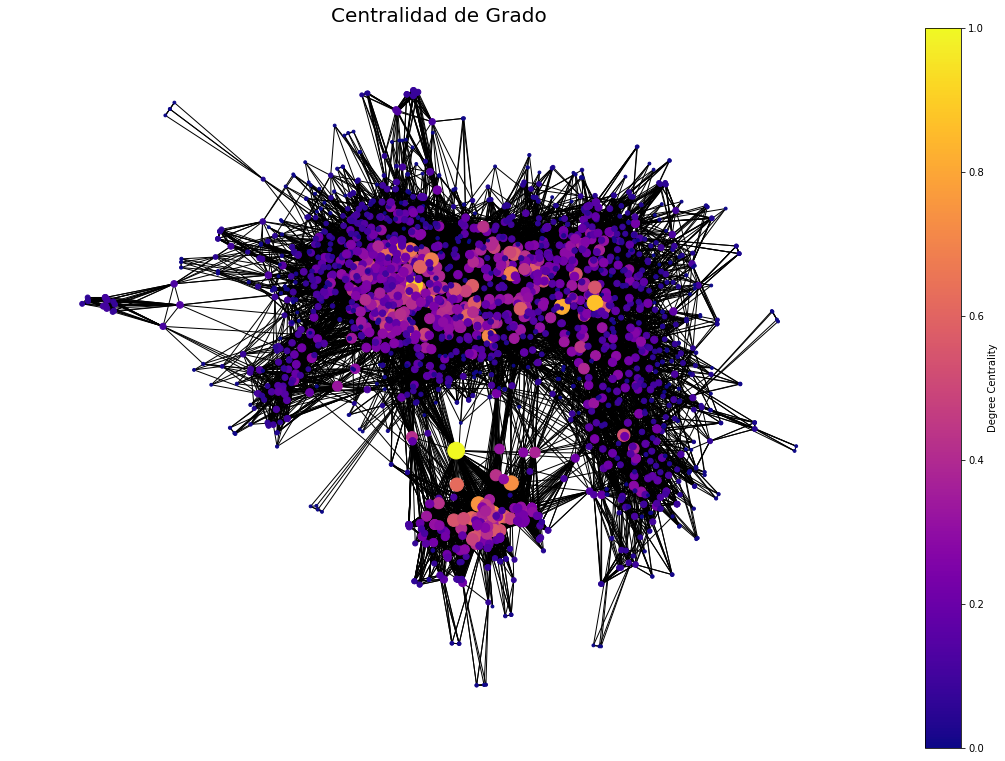

In [23]:
# Dibujar el grafo
plt.figure(figsize=(15, 10))
nx.draw(
        gestion,
        pos = nx.spring_layout(gestion, seed=30), 
        node_color=list(centrality.values()), 
        with_labels=False, 
        node_size=[v * 2 for v in degrees.values()], 
        cmap=plt.cm.plasma
       )
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Degree Centrality')
plt.title('Centralidad de Grado',fontsize = 20)
plt.show()

# Centralidad de Cercanía

In [25]:
#calculamos la centralidad de cercanía de todos los nodos
closeness = nx.closeness_centrality(gestion)

### Analizando el top 10

In [41]:
#top 5 de nodos según cercanía
closeness_top = [(k,v) for k,v in sorted(closeness.items(), key=lambda item:item[1], reverse=True)]
closeness_top[:10]

[('ASTNNL5FQRCZ3HBPEWM76TUQHQ', 0.40865173473869126),
 ('G3VCQKAQXFB3XCKOBBYG67MRBY', 0.4031629116117851),
 ('WHTP744VOJDCVER4AUUMA6HCDM', 0.39944194033054303),
 ('FDYMSVHLSVDKVJPU3BN73SFNPI', 0.3980748663101604),
 ('BSXXYEB6YRDJNIMIRDSSBBQZLU', 0.39228499156829677),
 ('E5SQTJ657FED7ENFIP4DYGR2YU', 0.391130727196301),
 ('5TM63SP26ZBNTN54OTZTOJTQUY', 0.3903922802601217),
 ('3JEDLCH7BRABDLGZBRSNZXD2MQ', 0.3902285594464248),
 ('JBYPSRFPQ5HOVFNPIHHBT4U5WA', 0.3886800334168755),
 ('2RJY4Q3VZ5F23NSPUWJCQQCF7Q', 0.3846630839189748)]

In [42]:
obtener_atributos(gestion,closeness_top,10)

,categoria,subcategoria,tipo_contenido,autor,titulo,caracteres
0,Tu dinero,Inmobiliarias,premium,José Carlos Reyes Leyva,Los tres distritos donde la inversión de un inmueble para alquiler se recupera más rápido,4561
1,Economia,Management & empleo,premium,José Carlos Reyes Leyva,Los cinco cambios laborales más relevantes del 2023: impactos en empresas y trabajadores,4929
2,Tu dinero,Inmobiliarias,premium,José Carlos Reyes Leyva,"Inmobiliarias pagarían más impuestos tras cambio de criterio de la Sunat, ¿en qué casos?",4344
3,Videos,Peru,metered,Redacción Gestión,¿Cuántos feriados habrá en Perú el 2024? Conoce AQUÍ las fechas,5
4,Economia,Empresas,premium,Ani Lu Torres,Las 14 regulaciones empresariales que estarán en la agenda este 2024,360
5,Peru,Peru,premium,Iveth Guzmán Castillo,Navidad y Año Nuevo: las rutas más demandadas para viajar en medio de anuncio de protestas,14083
6,Tu dinero,Tu dinero,premium,José Carlos Reyes Leyva,"Seis cambios tributarios que vienen este 2024, tanto para empresas y trabajadores",7321
7,Peru,Politica,premium,Carlos Hinostroza Sánchez,"Dina Boluarte y su primer año de gobierno: los aciertos, desaciertos y puntos a mejorar",12641
8,Peru,Peru,free,Redacción Gestión,San Marcos: ¿qué carreras tuvieron menos de 10 ingresantes y qué ocurre con las vacantes?,4200
9,Tu dinero,Tu dinero,free,Redacción Gestión,Aguinaldo por Navidad: los trabajadores que recibirán S/ 100 y S/ 300,2171


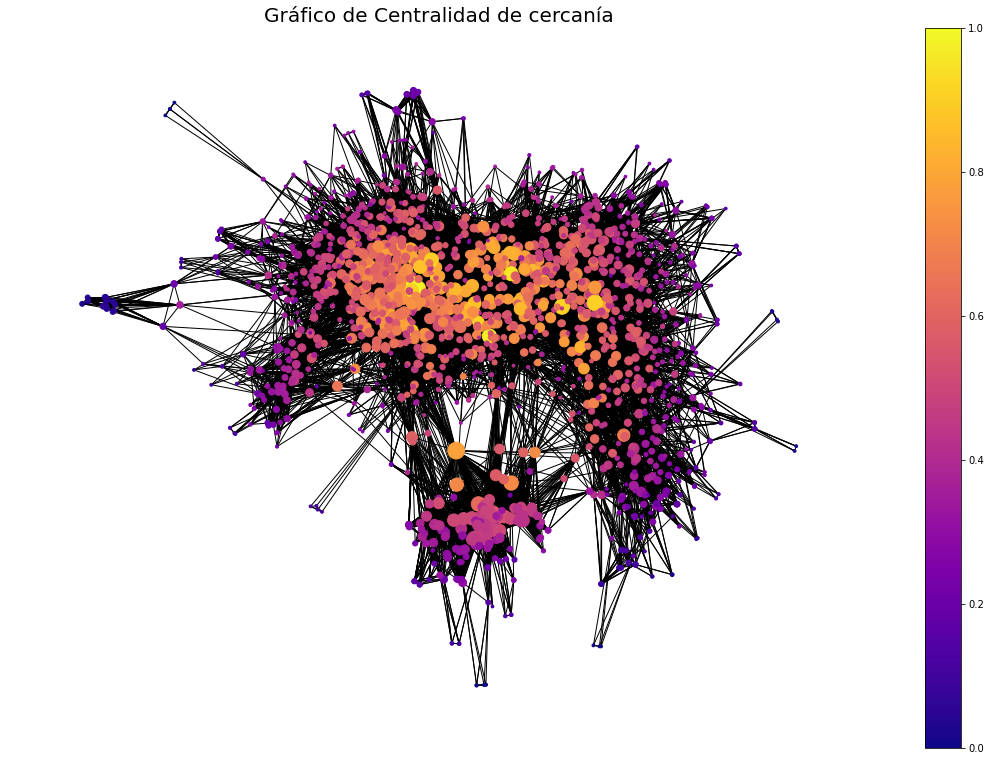

In [33]:
crear_grafico_colores(gestion,closeness,"Gráfico de Centralidad de cercanía")

# Centralidad de intermediación

In [35]:
#calculamos la centralidad de intermediario de todos los nodos
betweeness = nx.betweenness_centrality(gestion)

### Analizando el top 10 

In [43]:
#top de nodos según la centralidad de intermediario
betweeness_top = [(k,v) for k,v in sorted(betweeness.items(), key=lambda item:item[1], reverse=True)]
betweeness_top[:10]

[('Q37PDBDCGJGSNOK5RN6GQUNZZI', 0.04793519712950787),
 ('3JEDLCH7BRABDLGZBRSNZXD2MQ', 0.03866220934523445),
 ('E5SQTJ657FED7ENFIP4DYGR2YU', 0.03545919979875884),
 ('G3VCQKAQXFB3XCKOBBYG67MRBY', 0.03502552115713683),
 ('BSXXYEB6YRDJNIMIRDSSBBQZLU', 0.033987445909570195),
 ('ASTNNL5FQRCZ3HBPEWM76TUQHQ', 0.02951115299602016),
 ('AAELWBZTTNDZ3DDFBEMJPOL7V4', 0.027839445371859364),
 ('FDYMSVHLSVDKVJPU3BN73SFNPI', 0.025634187913816203),
 ('LHVCPIRDINDQJAY4U3D5ZLNVBA', 0.02476526075699992),
 ('NONTYXHHRRAAVNSXMW3WFYSQNI', 0.02368334529964021)]

In [44]:
obtener_atributos(gestion,betweeness_top,10)

,categoria,subcategoria,tipo_contenido,autor,titulo,caracteres
0,Mix,Respuestas,free,Redacción Mix,Pensión Bienestar 2024 - Link para consultar fecha de pago de 6 mil pesos,3200
1,Tu dinero,Inmobiliarias,premium,José Carlos Reyes Leyva,Los tres distritos donde la inversión de un inmueble para alquiler se recupera más rápido,4561
2,Economia,Empresas,premium,Alejandro Milla,Análisis: fortuna de las 17 familias más ricas de Perú supera los US$24.000M en 2023,6666
3,Economia,Management & empleo,premium,José Carlos Reyes Leyva,Los cinco cambios laborales más relevantes del 2023: impactos en empresas y trabajadores,4929
4,Videos,Peru,metered,Redacción Gestión,¿Cuántos feriados habrá en Perú el 2024? Conoce AQUÍ las fechas,5
5,Economia,Empresas,premium,Ani Lu Torres,Las 14 regulaciones empresariales que estarán en la agenda este 2024,360
6,Mix,Respuestas,free,Sergio Valzania,"Temblor en Guatemala hoy, 10/12/2023: lista de sismos con información oficial del INSIVUMEH",1231
7,Mix,Respuestas,free,Claudia Cuba,¿Qué le depara a cada signo el Año del Dragón de Madera? Predicciones y rituales según Horóscopo Chino,14200
8,Tu dinero,Tu dinero,premium,José Carlos Reyes Leyva,"Seis cambios tributarios que vienen este 2024, tanto para empresas y trabajadores",7321
9,Peru,Peru,free,Redacción Gestión,San Marcos: ¿qué carreras tuvieron menos de 10 ingresantes y qué ocurre con las vacantes?,4200


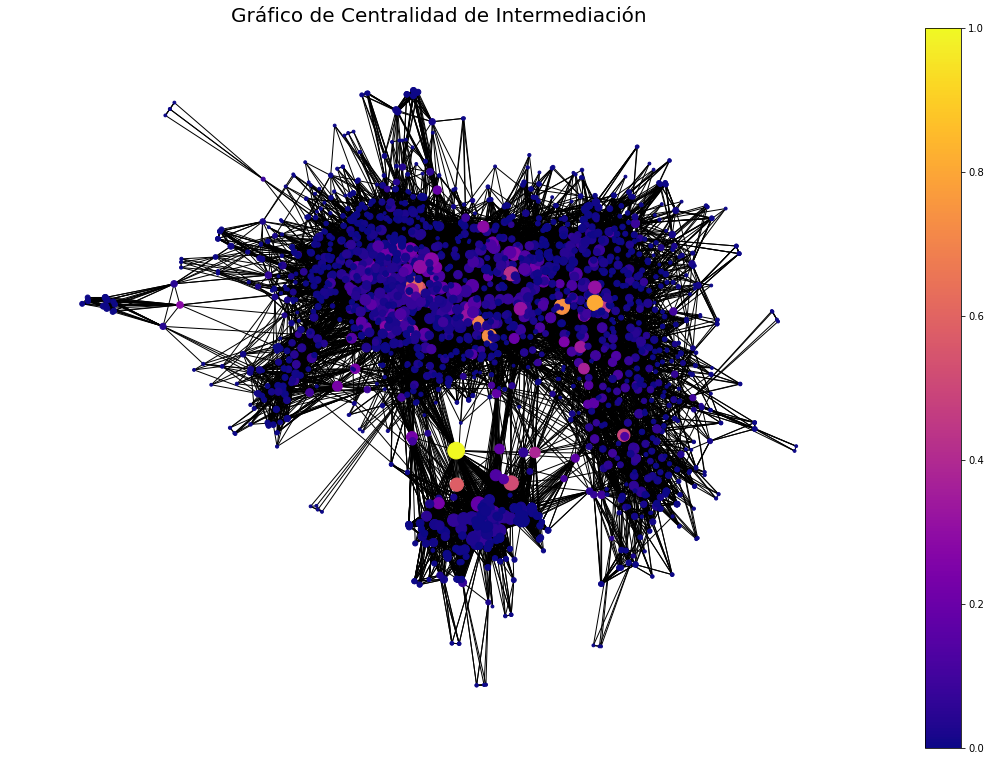

In [40]:
crear_grafico_colores(gestion,betweeness,"Gráfico de Centralidad de Intermediación")

# Mundo pequeño (Small World)

### Verificamos si la red tiene propiedades del mundo pequeño

Para verificar si nuestrp grafo tiene propiedades de mundo pequeño, debemos evaluar dos caracteristicas principales: El coeficiente de agrupamiento promedio y la longitud del camino más corto. Un grafo con alto coeficiente de agrupación y corta longitud media del camino más corto, sería un grafo con propiedades de mundo pequeño. Verifiquemos.

In [51]:
# coeficiente de agrupamiento global
coef_agrupa_global = nx.average_clustering(gestion)
coef_agrupa_global

0.6742746660392911

In [53]:
#Longitud media del camino mas corto
camino_corto = nx.average_shortest_path_length(gestion)
camino_corto

3.367948927357928